<a href="https://colab.research.google.com/github/eva-butler/CS4774/blob/main/CS4774_assignment__4__ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Benchmarking Neural Nets with the XOR Problem



### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For references, you may refer to my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe) if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_4_ann.ipynb**.



In [159]:
# You might want to use the following packages
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the train/validate/test set. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


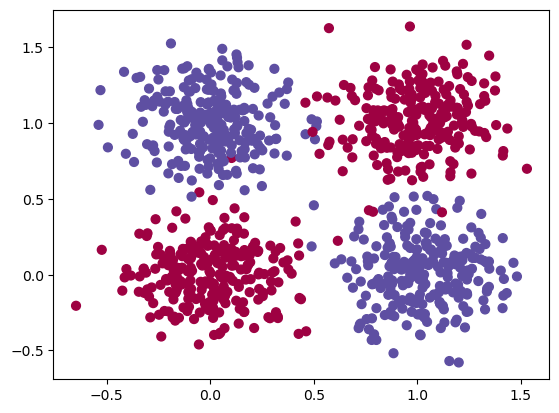

In [160]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK (20 pts)

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, you have to make attempt to tune the network to improve the model in term on classification accuracy. You have to report the accuracy of the network on the validation set.

In [161]:
import tensorflow as tf
from tensorflow import keras

my_model = keras.Sequential([
    keras.layers.Dense(6, activation="relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])
# Your code here!

my_model.compile(loss="binary_crossentropy" ,
              optimizer="sgd",
              metrics=["accuracy"])

history = my_model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_data=(X_val, y_val))

history.params
print(history.epoch)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5846 - loss: 0.7401 - val_accuracy: 0.5375 - val_loss: 0.7832
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6291 - loss: 0.7354 - val_accuracy: 0.5625 - val_loss: 0.7753
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 0.7151 - val_accuracy: 0.5750 - val_loss: 0.7678
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - loss: 0.7189 - val_accuracy: 0.5750 - val_loss: 0.7609
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.7191 - val_accuracy: 0.5625 - val_loss: 0.7543
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.7011 - val_accuracy: 0.5625 - val_loss: 0.7481
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6388 - loss: 0.7098 - val_accuracy: 0.5625 - val_loss: 0.7423
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - loss: 0.6972 - val_accuracy: 0.5750 - v

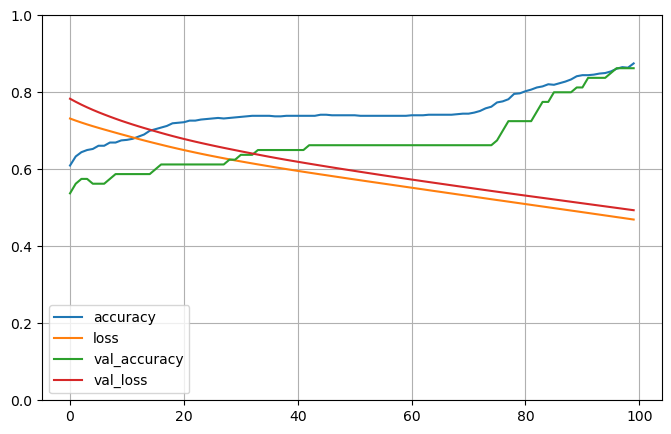

In [162]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

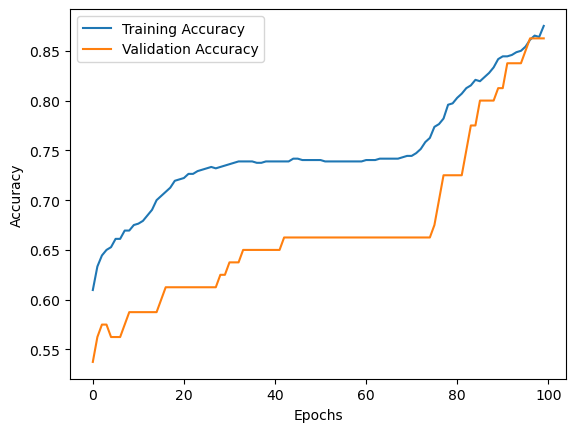

In [163]:


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [164]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {final_val_accuracy:.4f}")

Final validation accuracy: 0.8625


In [165]:
my_model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.5173 


[0.509971022605896, 0.8199999928474426]

- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK (50 pts)

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [166]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        self.W1 = np.random.randn(n1, n0)
        self.b1 = np.random.randn(n1, 1)
        self.W2 = np.random.randn(n2, n1)
        self.b2 = np.random.randn(n2, 1)

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse=False)

    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer
        # and softmax for the output layer

        Z1 = np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = np.exp(Z2)/np.sum(np.exp(Z2), axis = 1, keepdims = True)

        return A1, A2


    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """


        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)
        L = -np.sum(Y * np.log(A2)) / y.size

        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # You DO NOT CHANGE this function, ...
        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        m   = y.shape[0]
        dZ2 = A2 - self.one_hot(y)
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply( np.dot( self.W2.T, dZ2), 1-np.power( A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y , epochs, X_val, Y_val):
        """
        Learns parameters for the neural network and returns the model.

        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):

            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)

            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

            # Step 3: Gradient Descent
            self.W1 = self.W1 - self.alpha * dW1
            self.b1 = self.b1 - self.alpha * db1
            self.W2 = self.W2 - self.alpha * dW2
            self.b2 = self.b2 - self.alpha * db2

            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f"
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T

        # SUBTASK 5: Implement the prediction process.
        # Hint: It should include a forward pass, and then use the class with higher probability.
        #forward pass first 
        A1, A2 = self.forward_pass(X)
        y_hat = np.argmax(A2, axis =0)

        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)

        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))
        return Y.T # Transpose to get into same shape 1 x m


    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY (30 pts)
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version.

Epoch 0/100 - loss: 6.786132 - accuracy: 0.506944 - val_loss: 4.677699 - val_accuracy: 0.462500
Epoch 10/100 - loss: 6.731263 - accuracy: 0.525000 - val_loss: 4.591694 - val_accuracy: 0.475000
Epoch 20/100 - loss: 6.683618 - accuracy: 0.559722 - val_loss: 4.507519 - val_accuracy: 0.537500
Epoch 30/100 - loss: 6.658188 - accuracy: 0.622222 - val_loss: 4.452822 - val_accuracy: 0.587500
Epoch 40/100 - loss: 6.655987 - accuracy: 0.662500 - val_loss: 4.430804 - val_accuracy: 0.687500
Epoch 50/100 - loss: 6.667425 - accuracy: 0.694444 - val_loss: 4.428799 - val_accuracy: 0.712500
Epoch 60/100 - loss: 6.681431 - accuracy: 0.718056 - val_loss: 4.433774 - val_accuracy: 0.750000
Epoch 70/100 - loss: 6.690982 - accuracy: 0.745833 - val_loss: 4.437971 - val_accuracy: 0.775000
Epoch 80/100 - loss: 6.694429 - accuracy: 0.756944 - val_loss: 4.439127 - val_accuracy: 0.787500
Epoch 90/100 - loss: 6.693164 - accuracy: 0.768056 - val_loss: 4.437803 - val_accuracy: 0.775000
Accuracy on the test set is  0.

/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

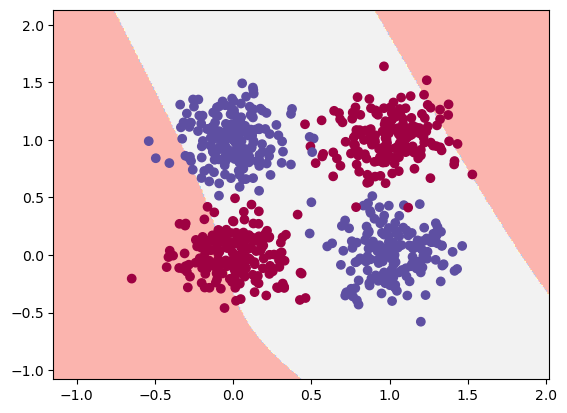

In [197]:
# MODEL 1 here
n0 = 2# input layer dimensionality
n1 = 8# hidden layer dimensionality
n2 = 2# output layer dimensionality
alpha = 0.05# learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

Epoch 0/100 - loss: 7.826477 - accuracy: 0.330556 - val_loss: 5.780124 - val_accuracy: 0.425000
Epoch 10/100 - loss: 7.519282 - accuracy: 0.566667 - val_loss: 5.228648 - val_accuracy: 0.537500
Epoch 20/100 - loss: 8.245388 - accuracy: 0.683333 - val_loss: 5.691639 - val_accuracy: 0.737500
Epoch 30/100 - loss: 8.437306 - accuracy: 0.694444 - val_loss: 5.749110 - val_accuracy: 0.762500
Epoch 40/100 - loss: 8.418755 - accuracy: 0.712500 - val_loss: 5.630686 - val_accuracy: 0.787500
Epoch 50/100 - loss: 8.267691 - accuracy: 0.725000 - val_loss: 5.448912 - val_accuracy: 0.800000
Epoch 60/100 - loss: 8.062074 - accuracy: 0.726389 - val_loss: 5.271309 - val_accuracy: 0.787500
Epoch 70/100 - loss: 7.873305 - accuracy: 0.725000 - val_loss: 5.134066 - val_accuracy: 0.787500
Epoch 80/100 - loss: 7.696023 - accuracy: 0.727778 - val_loss: 5.017637 - val_accuracy: 0.762500
Epoch 90/100 - loss: 7.527394 - accuracy: 0.755556 - val_loss: 4.913765 - val_accuracy: 0.750000
Accuracy on the test set is  0.

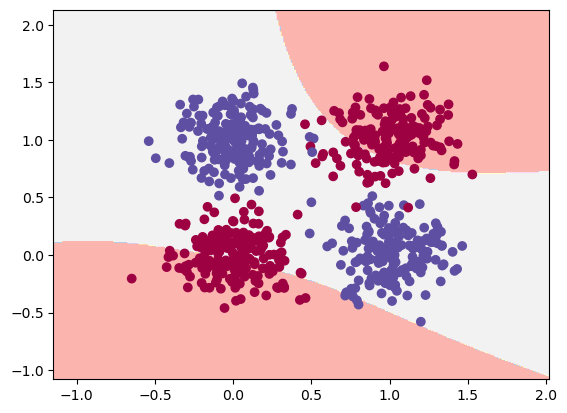

In [273]:
# MODEL 2 here
n0 = 2# input layer dimensionality
n1 = 29# hidden layer dimensionality
n2 = 2# output layer dimensionality
alpha = 0.083# learning rate for gradient descent
epochs =100 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

Epoch 0/140 - loss: 8.014279 - accuracy: 0.655556 - val_loss: 6.008727 - val_accuracy: 0.700000
Epoch 10/140 - loss: 8.980670 - accuracy: 0.869444 - val_loss: 6.288546 - val_accuracy: 0.862500
Epoch 20/140 - loss: 9.461595 - accuracy: 0.701389 - val_loss: 6.726134 - val_accuracy: 0.625000
Epoch 30/140 - loss: 9.382426 - accuracy: 0.750000 - val_loss: 6.468862 - val_accuracy: 0.787500
Epoch 40/140 - loss: 9.116450 - accuracy: 0.783333 - val_loss: 6.088907 - val_accuracy: 0.837500
Epoch 50/140 - loss: 8.820792 - accuracy: 0.818056 - val_loss: 5.783902 - val_accuracy: 0.825000
Epoch 60/140 - loss: 8.554181 - accuracy: 0.798611 - val_loss: 5.553555 - val_accuracy: 0.837500
Epoch 70/140 - loss: 8.322131 - accuracy: 0.809722 - val_loss: 5.376606 - val_accuracy: 0.825000
Epoch 80/140 - loss: 8.121985 - accuracy: 0.840278 - val_loss: 5.237435 - val_accuracy: 0.837500
Epoch 90/140 - loss: 7.944897 - accuracy: 0.872222 - val_loss: 5.121409 - val_accuracy: 0.837500
Epoch 100/140 - loss: 7.781749 

/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

Epoch 110/140 - loss: 7.634465 - accuracy: 0.934722 - val_loss: 4.932044 - val_accuracy: 0.900000
Epoch 120/140 - loss: 7.508903 - accuracy: 0.958333 - val_loss: 4.861124 - val_accuracy: 0.900000
Epoch 130/140 - loss: 7.405462 - accuracy: 0.975000 - val_loss: 4.804594 - val_accuracy: 0.900000
Accuracy on the test set is  0.935


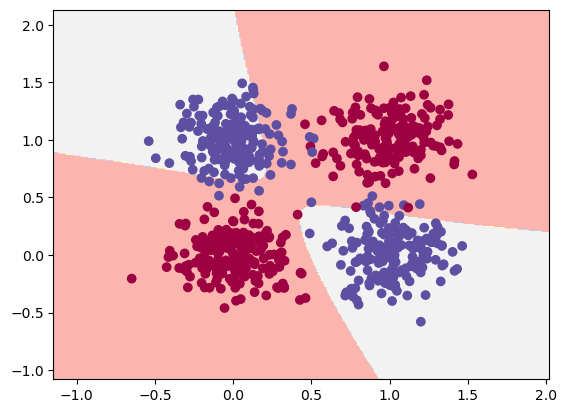

In [307]:
# MODEL 3 here
n0 = 2# input layer dimensionality
n1 = 60# hidden layer dimensionality
n2 = 2# output layer dimensionality
alpha = 0.14# learning rate for gradient descent
epochs =140 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

In [312]:
# COMPARISONS WITH THE STANDARD LIBRARY
loss, accuracy = my_model.evaluate(X_test, y_test)
print(f'Standard Library accuracy on test set: {accuracy * 100:.2f}%')



accuracy = myModel1.evaluate(X_test, y_test)
print(f'My network accuracy on test set: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.5173 
Standard Library accuracy on test set: 82.00%
My network accuracy on test set: 93.50%


## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

My network performed at a 93.50% accuracy percentage in comparison to the standard library at 82%. I might not have tuned the hyperparameter of my model using the standard library enough, so I think it actually could perform better. Now that I understand a little more about what goes on behind the scenes when the ANN are working, I think I would be able to better tune the library models in the future. There isn't a huge different in the implementations of the models, after you write out the methods. You pretty much do it the same way. I found that implementing the methods were a bit difficult. I had a hard time with the dimensions of the matrices, but once I fixed that part it was much more smooth sailing. I think implementing my own learning algorithm definitely helped improve my understanding of how the artificial neural networks work and I will be able to use the standard library more effectively in the future. 

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe)
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 4:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!